 <h1>Boris Bike Analysis</h1>
 
<p>Santander Cycles is a public bicycle hire scheme in London. The scheme's bicycles are popularly known as Boris Bikes, after Boris Johnson who was Mayor of London when the scheme began operating in 2010.</p>

<p>Tourists, residents and commuters can all pay to use the bikes and since their launch, the bikes had been hired an impressive 93,299,451 times by 30 June 2020 (Transport for London - TfL).</p>

<p>The number of data generated from the hiring of Boris bikes is even bigger. A marketing agency can easily use it to spot user types or  Governments to identify common users behaviours.</p>

<p>I will use the dataset to identify <b>user type</b>, <b>the busiest time for each user type</b>, and <b>the routes they usually take</b> in 2016. </p>

<h3>The Dataset</h3>

<p>The Santander Cycles data is composed of two tables: cycle_hire and cycle_stations.</p>

<p>The cycle_hire table has the information of each hire event for example which station the user picks up and drop off the bike, date and time of both events and the trip duration. The table conteins one row per rental. Each rental has a unique ID number and wchich is the primary key of the table. </p>

<p>The cycle_stations table conteins the station information, from name stations, to the station's longitude and latitude. Each station has an unique number ID. This unique station ID is the primary key for this table also the foreing key.</p>

<p>Both dataset are public. I will export them from <b>Bigquerry</b> using google.cloud module.</p>

<h3>Query and visualisation</h3>

<p>The queries are made in SQL, prepared with pandas (when required) and plotted with matplotlib . </p>

<h3>Data Studio</h3>

I built a GEO-Graphic map using Latitute and Longitute on Data Studio using the Santander Cycles dataset. It is super interesting! Here is the link. https://datastudio.google.com/reporting/73406200-7706-49f2-bf65-4e4f2f1c6b14

<h3>Libaries</h3>

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mtickers
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [3]:
import pandas_datareader as pdr

import io

In [4]:
from datetime import datetime, timedelta

In [5]:
from google.oauth2 import service_account

from google.cloud import bigquery
from google.cloud import bigquery_storage


credentials = service_account.Credentials.from_service_account_file("C:\\Users\\andre\\OneDrive\\Documentos\\Application\\Database CA-187c5aed24ce.json")

project_id = 'database-ca-300519'

# Construct a BigQuery client object.
client = bigquery.Client(credentials= credentials,project=project_id)
                         
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=credentials)


<h3>Cycle Hire  Data Set</h3>

In [6]:
# SQL format, including the project ID and dataset ID.
table_id = "bigquery-public-data.london_bicycles.cycle_hire"

# Use the BigQuery Storage API to speed-up downloads of large tables.
cycle_hire = client.list_rows(table_id).to_dataframe()

cycle_hire.head(10)


,rental_id,duration,bike_id,end_date,end_station_id,end_station_name,start_date,start_station_id,start_station_name,end_station_logical_terminal,start_station_logical_terminal,end_station_priority_id
0,63022577,600,8930,2017-03-12 13:26:00+00:00,55.0,"Finsbury Circus, Liverpool Street",2017-03-12 13:16:00+00:00,443.0,"Philpot Street, Whitechapel",NaN,NaN,NaN
1,41340757,540,9260,2015-02-20 19:07:00+00:00,58.0,"New Inn Yard, Shoreditch",2015-02-20 18:58:00+00:00,95.0,"Aldersgate Street, Barbican",NaN,NaN,NaN
2,47466877,2040,11137,2015-09-03 10:24:00+00:00,210.0,"Hinde Street, Marylebone",2015-09-03 09:50:00+00:00,5.0,"Sedding Street, Sloane Square",NaN,NaN,NaN
3,53171329,5760,7033,2016-04-24 13:52:00+00:00,733.0,"Park Lane, Mayfair",2016-04-24 12:16:00+00:00,368.0,"Harriet Street, Knightsbridge",NaN,NaN,NaN
4,42268703,900,7005,2015-04-02 13:06:00+00:00,248.0,"Triangle Car Park, Hyde Park",2015-04-02 12:51:00+00:00,108.0,"Abbey Orchard Street, Westminster",NaN,NaN,NaN
5,59566390,240,192,2016-10-19 17:56:00+00:00,107.0,"Finsbury Leisure Centre, St. Luke's",2016-10-19 17:52:00+00:00,54.0,"Golden Lane, Barbican",NaN,NaN,NaN
6,50732832,1560,2813,2016-01-08 15:51:00+00:00,87.0,"Devonshire Square, Liverpool Street",2016-01-08 15:25:00+00:00,352.0,"Vauxhall Street, Vauxhall",NaN,NaN,NaN
7,48576845,420,1849,2015-10-08 17:21:00+00:00,119.0,"Bath Street, St. Luke's",2015-10-08 17:14:00+00:00,120.0,"The Guildhall, Guildhall",NaN,NaN,NaN
8,57533200,840,114,2016-08-23 08:41:00+00:00,3.0,"Christopher Street, Liverpool Street",2016-08-23 08:27:00+00:00,593.0,"Northdown Street, King's Cross",NaN,NaN,NaN
9,40574018,720,10931,2015-01-15 12:22:00+00:00,514.0,"Portman Square, Marylebone",2015-01-15 12:10:00+00:00,260.0,"Broadwick Street, Soho",NaN,NaN,NaN


In [7]:
cycle_hire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24369201 entries, 0 to 24369200
Data columns (total 12 columns):
 #   Column                          Dtype              
---  ------                          -----              
 0   rental_id                       int64              
 1   duration                        int64              
 2   bike_id                         int64              
 3   end_date                        datetime64[ns, UTC]
 4   end_station_id                  float64            
 5   end_station_name                object             
 6   start_date                      datetime64[ns, UTC]
 7   start_station_id                float64            
 8   start_station_name              object             
 9   end_station_logical_terminal    float64            
 10  start_station_logical_terminal  float64            
 11  end_station_priority_id         float64            
dtypes: datetime64[ns, UTC](2), float64(5), int64(3), object(2)
memory usage: 2.2+ GB


<h3>Cycle Station Data Set</h3>

In [8]:
# SQL format, including the project ID and dataset ID.
table_id = "bigquery-public-data.london_bicycles.cycle_stations"

# Use the BigQuery Storage API to speed-up downloads of large tables.
cycle_station = client.list_rows(table_id).to_dataframe()


In [9]:
cycle_station.head(10)

,id,installed,latitude,locked,longitude,name,bikes_count,docks_count,nbEmptyDocks,temporary,terminal_name,install_date,removal_date
0,484,True,51.528828,false,-0.013258,"Bromley High Street, Bow",0,0,0,False,22172,2012-01-23,None
1,185,True,51.488058,false,-0.140741,"Alderney Street, Pimlico",12,14,0,False,1174,2010-07-17,None
2,99,True,51.514578,false,-0.158264,"Old Quebec Street, Marylebone",16,16,0,False,1085,2010-07-14,None
3,232,True,51.515010,false,-0.112753,"Carey Street, Holborn",16,16,0,False,1139,2010-07-20,None
4,257,True,51.522482,false,-0.154907,"Westminster University, Marylebone",16,16,0,False,1194,2010-07-21,None
5,292,True,51.498884,false,-0.165472,"Montpelier Street, Knightsbridge",16,16,0,False,1206,2010-07-22,None
6,6,True,51.518118,false,-0.144229,"Broadcasting House, Marylebone",18,18,0,False,3424,2010-07-04,None
7,260,True,51.513685,false,-0.135581,"Broadwick Street, Soho",18,18,0,False,3489,2010-07-21,None
8,383,True,51.513103,false,-0.131214,"Frith Street, Soho",18,18,0,False,2660,2011-02-02,None
9,431,True,51.534474,false,-0.122203,"Crinan Street, King's Cross",20,20,0,False,22183,2011-12-08,None


In [10]:
cycle_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             789 non-null    int64  
 1   installed      789 non-null    bool   
 2   latitude       789 non-null    float64
 3   locked         789 non-null    object 
 4   longitude      789 non-null    float64
 5   name           789 non-null    object 
 6   bikes_count    789 non-null    int64  
 7   docks_count    789 non-null    int64  
 8   nbEmptyDocks   789 non-null    int64  
 9   temporary      789 non-null    bool   
 10  terminal_name  789 non-null    object 
 11  install_date   708 non-null    object 
 12  removal_date   3 non-null      object 
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 69.5+ KB


<h1>Lets Get Started!</h1>

<h2>Section 1 - Who?</h2>
<p>This section is dedicated to distinguishing the user types that hires the Boris bike. Apart from that, I will justify why they have differents behaviour by using reports from 2016.  </p>
<h3>Total bike per day</h3>

<p>First, I want to have an overview of the rental bikes over full year to help me to gain insights into seasonality and other trends. The sum of cycles rented per day will give me a better picture of the scenario.</p>
<p>For this purpose, I will plot a line graph. For a more comprehensive understanding, I will split the graph by seasons.</p>


In [11]:
#bigquery query

sql_query = """  
SELECT 
    date(start_date) as date,
    COUNT (rental_id) as  n_rides
FROM `bigquery-public-data.london_bicycles.cycle_hire` 
WHERE start_date between '2016-01-01' and '2017-01-01'
GROUP BY date  
ORDER BY n_rides desc
"""  

result = client.query(sql_query).to_dataframe()

In [12]:
#creattring season collumns in the data frama usign pandas 

result['season'] = result['date']

# creatting  the range for each seasson sepparaly  
winter_time1 = pd.date_range('2016-01-01' , '2016-03-20' , freq = 'D').date
spring_time = pd.date_range('2016-03-21' , '2016-06-19' , freq = 'D').date
summer_time = pd.date_range('2016-06-20' , '2016-09-22 ' , freq = 'D').date
fall_time = pd.date_range('2016-09-23' , '2016-12-20' , freq = 'D').date
winter_time2 = pd.date_range('2016-12-21' , '2016-12-31' , freq = 'D').date

#comparing the seasson columns with the range created 
winter = result['season'].isin(winter_time1) | result['season'].isin(winter_time2)
spring = result ['season'].isin(spring_time)
summer =result['season'].isin(summer_time)
autumn = result['season'].isin(fall_time)

#Inserting the label
result['season'].loc[winter] ='winter'
result['season'].loc[spring] = 'spring'
result['season'].loc[summer] = 'summer'
result['season'].loc[autumn] = 'autumn'

C:\Program Files\Python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


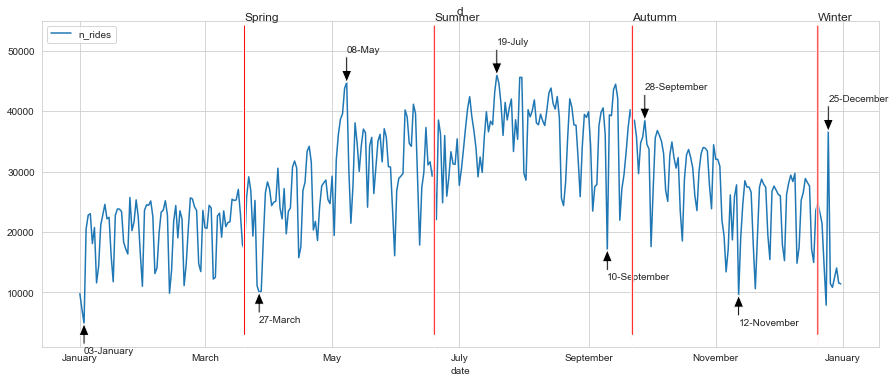

In [13]:
#Plotting 
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1,1,1)

result.plot(x = 'date', y = 'n_rides', ax = ax  , legend = True , title = 'd' )

#formatting X axis ticks labes
myFmt = mdates.DateFormatter('%B')
ax.xaxis.set_major_formatter(myFmt)

ax.set_ylim(1000,55000)
ax.grid(b = True , which = 'both')

#season peaks 
winter_peak = result[winter].sort_values(['n_rides'] , ascending = False)
summer_peak = result[summer].sort_values(['n_rides'] , ascending = False )
spring_peak = result[spring].sort_values(['n_rides'] , ascending = False )
autumn_peak = result[autumn].sort_values(['n_rides'] , ascending = False)


#Locating peack in each season
peak_dict = {'spring' :[spring_peak.iloc[0],spring_peak.iloc[-1]] , 'summer' :[summer_peak.iloc[0],summer_peak.iloc[-1]],
             'autumn' : [autumn_peak.iloc[0] , autumn_peak.iloc[-1]] ,'winter' : [winter_peak.iloc[0], winter_peak.iloc[-1]] }


for season , peak in peak_dict.items():
    # the Busiest days
    ax.annotate(peak[0][0].strftime('%d-%B') , xy = ( peak[0][0] , peak[0][1] ) , xytext = ( peak[0][0] , peak[0][1] + 5000),
                 fontsize = 10, arrowprops = dict(facecolor = 'black'  , headwidth = 10 , width = 2))
    # the Quiest days
    ax.annotate(peak[1][0].strftime('%d-%B') , xy = ( peak[1][0] , peak[1][1] ) , xytext = ( peak[1][0] , peak[1][1] - 5000),
                 fontsize = 10, arrowprops = dict(facecolor = 'black'  , headwidth = 10 , width = 2))

# season separetaor 
season_divisions = {'Spring'  :datetime(2016,3,20).date() ,'Summer':datetime(2016,6,19).date(),
                    'Autumm':datetime(2016,9,22).date() ,'Winter':datetime (2016,12,20).date()}

for season , start_day in season_divisions.items():
    ax.annotate(season , xy = (start_day, 920) , xytext= (start_day,55000), fontsize = 12, arrowprops = dict (facecolor = 'red' , headwidth = 1 , width =2))
    
#legend location
ax.legend(loc = 2)


 Above, the graph shows the number of the total rental bikes per day in 2016. I highlighted the busiest and quietest days in each season  with arrows for deeper investigation. 
 
First let's analyse the blue line. 
 
<p> As expected, the highest numbers of hired bikes are over the summer - around 3.4 M bikes hired. Spring and Autumn seem to share the 2nd position, but spring is slightly ahead with approximately 2.6 M and 2.4 M, respectively (see graph below). Winter clearly is the season that has the lowest amount of rentals, with around 1.7M rentals. This could be a combination of colder weather and decreased tourism. Which could drive rental numbers down</p>
 
Now, let's investigate the days pointed by the arrows. 

<h4>The busiest day of the year was a Tuesday.</h4> 
  <p>The busiest day of the year was the 19th July, with approximately 45 000 bikes were hired. Surprisingly, this was Tuesday was a Tuesday and not a Saturday or Sunday. However, 19-July was <a ="https://www.itv.com/news/2016-07-19/weather-britain-hottest-day-of-year"> the hottest day of the year in London in 2016 </a>, reaching 33°C. Let's Check some reports over this hot day on : <a href="https://www.bbc.co.uk/news/live/uk-england-london-36636139#lx-commentary-top">the BBC page</a> :</p>
  
 
  <p style="text-align:center"><i>"Bicycle tyre 'explodes in heat"</i></p>
  <p style="text-align:center"><i>"London Ambulance Service receiving hundreds of calls due to heatwave"</i></p>
  <p style="text-align:center"><i>"Trains cancelled due to 13ft-deep track hole 'above sewer' in Forest Hill"</i></p>
  <p style="text-align:center"><i>Line at Forest Hill to remain closed until Wednesday'</i></p>
  <p style="text-align:center"><i>"Travel: Heat affects train services out of London"</i></p>

Reading the news reports, we can almost see the scenario. The first and second reports tell us that London was seriously hot. Squeezing yourself onto public transport, like the underground doesn't sound like a good idea. In addition, the third and fourth reports say that there was a problem at the line  Forest Hill , <a href= "https://www.bbc.co.uk/news/uk-england-london-36832879" >closing the overground stations between West Croydon/Crystal Palace and New Cross Gate </a>. Hence, making commuters choose a different form of public transport to go work or come back home.

In summary,people probably didn't want to take public transport because it was too hot, and public transport was more crowded then the normal. Cycling was better idea.

<h4> Weather vs Weekend Cyclists</h4>
<p>All the lowest number of rental are on a weekend day. Even the 27th of March, which is a Sunday before Easter Monday. Bad wheater is the common factor in each of theses dates: 3rd Jan (Sunday), 10th Sep (Saturday) and 12th Nov (Saturday), 27th Mar (Sunday). On these days there was rain or strong winds for at least 2 hours. This suggests that weekend cyclists are not committed to cycling when the wether is bad.</p>
 
<a href="https://www.timeanddate.com/weather/uk/london/historic">Past Weather in London, England, United Kingdom</a>


<h4> Another Public Delay on Public Transport</h4>
 
   <p>The busiest day in spring was on Tuesday the 08th of May. The temperature was 26°C which is above the average. This peak might be caused by a combination of hot weather and  public transports issues, as the BBC reported on the date at 17:12.</p>
   <p style="text-align:center"><i>"Travel: Road closures and bus diversions in Leyton, Overground delays and no Heathrow Connect"</i>
   <a href=https://www.bbc.co.uk/news/live/uk-england-london-35594685#lx-commentary-top>  Report link </a></p>
   
   
<h3> Conclusion - User types </h3>
  <p>The graph and reports suggest two different user types. The <b>weekend/holiday cyclists</b> and the <b>commuter cyclists</b>. The first user hires the bike for leisure, and in case of bad weather, the number of rentals goes down and can reach the lowest rentals of the year. The second user hires the Boris bike for transportation over weekdays. This is evident when there is a public transport problem as the number of rentals reaches the highest in the year. </p>

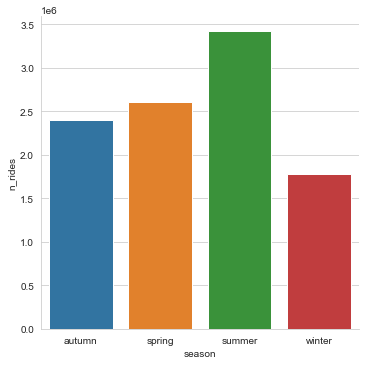

In [14]:
total_by_season = result.groupby(by = 'season' , as_index = False).sum()

sns.catplot(x = 'season' , y= 'n_rides' , data= total_by_season , kind = 'bar')

<h1>Section 2- When?</h1>
  <p>What are the busiest time for each group? There is any explanation for that? In order to answer these questions, I will split the dataset into "weekend "and "weekday". I will also investigate the average number of rentals in each hour of the day for both groups. </p>
<h3>2.1 -  Weekend x Weekday</h3>
    

<p>The average will be calculate by the sum of rentals in the period (Monday to Friday ; Saturday and Sunday) divided by the number of the day in this period.</p>

<ul>
<li>AvgWeeksday = SUM (number of weekday's rental) / 5 </li>
    <li>AvgWeekend = SUM (number of weekend's rental) / 2</li>
   </ul>

In [15]:
sql_query = """

SELECT
    COUNT (rental_id)/count(DISTINCT (extract(date from start_date))) as avg ,
    EXTRACT(HOUR FROM start_date) as time,
    CASE 
    WHEN EXTRACT(DAYOFWEEK FROM start_date) >=2 AND EXTRACT(DAYOFWEEK FROM start_date) <=6 THEN 'week day'
     ELSE 'weekend' END as day
FROM `bigquery-public-data.london_bicycles.cycle_hire` 
WHERE start_date BETWEEN '2016-01-01' AND '2017-01-01'
GROUP BY 3,2
ORDER BY 2

"""
result = client.query(sql_query).to_dataframe()

Text(0, 0.5, 'Avg')

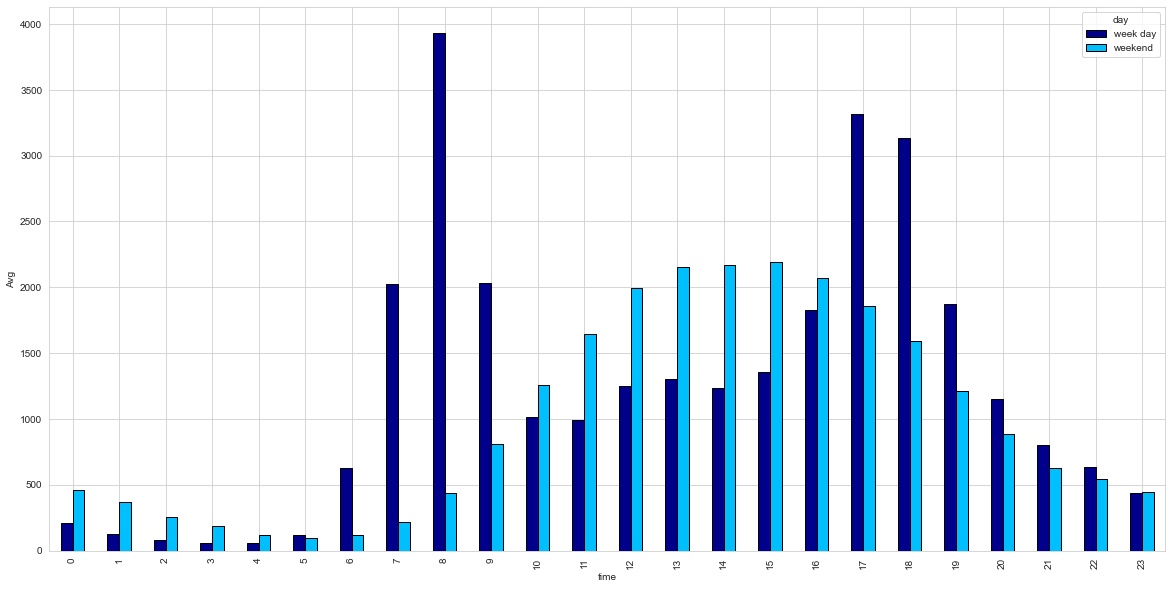

In [16]:
result = result.pivot(index = 'time' ,columns ='day', values = 'avg')

fig = plt.figure(figsize = (20,10) )
ax1 = fig.add_subplot(1,1,1)

result.plot.bar(ax = ax1 , color=['darkblue','deepskyblue'] , edgecolor = 'black')

plt.ylabel('Avg')

<p>Graph 3 shows the rental average per hour during the day. We can see that Weekdays has two peaks while weekend has a symmetric bell-shaped curve.</p>

<h4>What is going on 8 and 5pm on weekdays? </h4>
<p>We spot two different peaks at 8am and at 5-6pm, looking to the weekday's bar. These two peaks might be caused by the commuters, who need to be at work around 9am and then their way back home around 5pm. Almost 4,000 bikes are hired every day at 8:00, which is the busiest time of the week. The second peak is at 5pm at the end of the typical working day at just under 3,500 rentals.</p>

<h4>Weekend cycling</h4>
<p>The weekend has a symmetric bell-shaped curve. The curve only overtakes the 1,000 rentals at 10am and reaches the peak at 1pm  with over 2,000 bikes hired. The curve stays flat with over 2,000 bikes hired from 1pm to 3pm  and then starts a continuous descent until hits less than 1,000 rentals between 7 and 8pm. That might be due to the cyclists who want to enjoy the outdoors the daylight and the park. </p> 

<p>  Graph 3 represents the average bike hired daily in each hour in 2016. However, the number of rentals varies between season as we saw in the first graph. For this reason, in the next section I will split the data into seasons and analys the average number of rentals per hour of day</p> 

<h3>2.2 - Weekend vs Weekday per Season<h3>

In [17]:
sql_query = """
SELECT
    COUNT (rental_id)/count(DISTINCT (extract(date from start_date))) as avg ,
    EXTRACT(HOUR FROM start_date) as time,
    CASE 
     WHEN start_date BETWEEN '2016-09-23' AND '2016-12-20' THEN 'autumn'
     WHEN start_date BETWEEN '2016-03-21' AND '2016-06-19' THEN 'spring'
     WHEN start_date BETWEEN '2016-06-20' AND '2016-09-22' THEN 'summer'
     ELSE 'winter' END as seasons,
    CASE 
     WHEN EXTRACT(DAYOFWEEK FROM start_date) >=2 AND EXTRACT(DAYOFWEEK FROM start_date) <=6 THEN 'week day'
     ELSE 'weekend' END as DAY
FROM `bigquery-public-data.london_bicycles.cycle_hire` 
WHERE start_date BETWEEN '2016-01-01' AND '2017-01-01'
GROUP BY 2,3,4
order by 2,3,4
"""

result = client.query(sql_query).to_dataframe()

In [18]:
winter= (result.iloc[:,2] == 'winter')
spring = (result.iloc[:,2] == 'spring')
summer = (result.iloc[:,2] == 'summer') 
autumn  = (result.iloc[:,2] == 'autumn') 

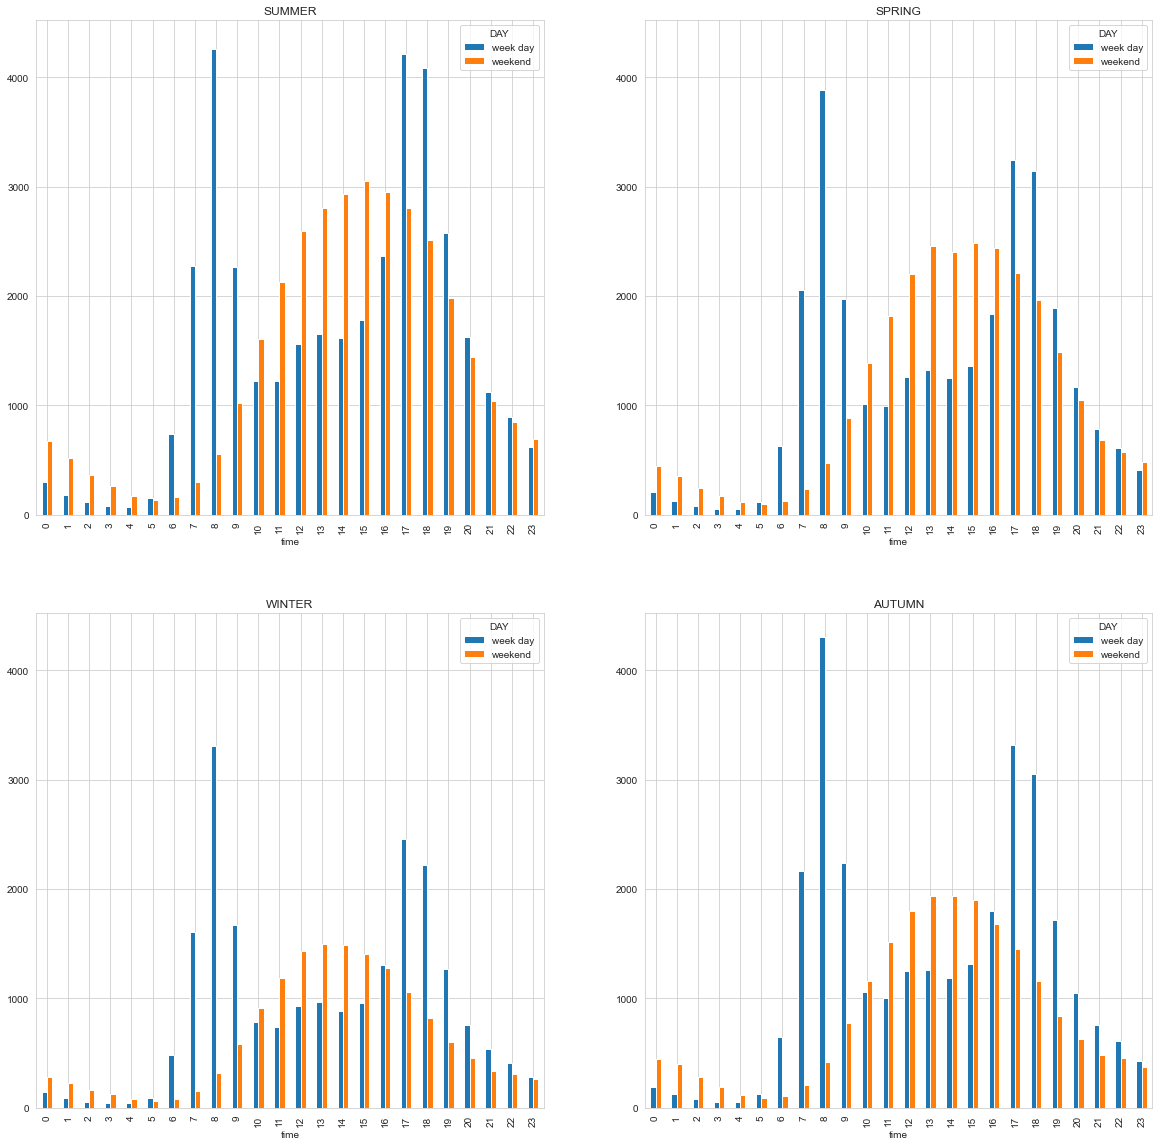

In [19]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2 , sharey= ax1)
ax3 = fig.add_subplot(2,2,3 , sharey= ax1)
ax4 = fig.add_subplot(2,2,4 , sharey= ax1)

result[summer].pivot(index = 'time' , columns = 'DAY' , values = 'avg').plot.bar(ax = ax1 , title = 'SUMMER')
result[spring ].pivot(index = 'time' ,columns = 'DAY' , values = 'avg').plot.bar(ax = ax2 , title = 'SPRING')
result[winter].pivot(index = 'time' , columns = 'DAY' , values = 'avg').plot.bar(ax = ax3 , title = 'WINTER')
result[autumn].pivot(index = 'time' , columns = 'DAY' , values = 'avg').plot.bar(ax = ax4 , title = 'AUTUMN')

ax2.yaxis.set_tick_params(labelbottom=True)
ax4.yaxis.set_tick_params(labelbottom=True)


The figure above represents four bar graphs for the average bike hired daily in each hour in the weekday and weekend for each season. Here we can have a clearer idea what is going on in each hour of the day. 


<h4>Weeksday - Fixed Peaks </h4>
<p>Firstly, the hours of 8am and 5pm during weekdays are fixed peaks. They do not change according to season. The range of average hired bikes at 8am is between around 4,200 (summer) and 3,300 (winter). The average drops significantly from 9am. This probably due to the majority of commuters starting work at 9am. </p>

<p>Considering the weekday peak is caused by commuters, the second peak should have had approximately equal numbers as the first peak during summer. A good explanation for this phenomenon is the daylight. Cycling in the dark without any proper equipment is not safe. Others factor may include tiredness and socail activities fter work day might justify the difference.</p>



<h3> 2.3 Conclusion-The busiest time for each user type</h3>

<p>The graph shows the highest average of rentals on weekdays at <b>8am</b> and <b>5pm</b>. These peaks don't change over the year and are caused by <b>commuter cyclists </b> who work the typical office of 9am to 5pm. </p>

<p>During the weekend, the peak fluctuates according to the season. <b>Weekend cyclists</b> usually hire a bike during daylight. That is why the highest number of bike hired during the weekend varies between <b>1 to 3pm</b>.</p>

<h2>Section 3 - From Where to Where?</h2>
<p>This section is the final piece of the puzzle. I will investigate where are the busiest start stations at peak times for each group. </p>

<h3>3.1 - Weekday Start Stations at 8am </h3> 

<p>Let's see where the majority of the people start their cycling journey at 8am</p>

In [20]:
sql_query = """
SELECT 
    start_station_name,
    COUNT (rental_id)/count(DISTINCT (extract(date from start_date))) as avg,
    EXTRACT (HOUR FROM start_date) as hours,
    CASE 
        WHEN EXTRACT (DAYOFWEEK FROM start_date) >= 2 AND EXTRACT (DAYOFWEEK FROM start_date) <= 6 THEN 'week'
        ELSE 'weekend' END as day 
FROM `bigquery-public-data.london_bicycles.cycle_hire` 
WHERE start_date BETWEEN '2016-01-01' AND '2017-01-01'
GROUP BY 1,3,4
HAVING day = 'week' and hours  = 8
ORDER BY 2 DESC
"""

result = client.query(sql_query).to_dataframe()

In [21]:
result.head(10)

,start_station_name,avg,hours,day
0,"Belgrove Street , King's Cross",132.621622,8,week
1,"Waterloo Station 3, Waterloo",112.290196,8,week
2,"Waterloo Station 1, Waterloo",83.804688,8,week
3,"Waterloo Station 2, Waterloo",42.702811,8,week
4,"Wormwood Street, Liverpool Street",28.906977,8,week
5,"Finsbury Circus, Liverpool Street",28.741176,8,week
6,"Queen Street 1, Bank",23.486166,8,week
7,"Sun Street, Liverpool Street",22.838710,8,week
8,"Kennington Lane Rail Bridge, Vauxhall",22.817829,8,week
9,"Duke Street Hill, London Bridge",21.328063,8,week


<h4>Train stations</h4>
<p>As you may notice, all these 10 stations are nearby a train station. The table above suggests some workers living outside of central London travel by train to the city centre and then hire a Boris bike to complete their journey to work. Here are the train stations near each bike station.
<table>
    <tr>
    <th>Bike Station </th>
    <th>Trains staion </th>
    <th>Daily Rental Average  from 8:00 to 8:59 </th>  
    </tr>
    <tr><td><ul><li>Belgrove Street , King's Cross</li></ul></td> <td>King's Cross </td><td>132.62</td></tr>
    <tr><td><ul><li>Waterloo Station 1, Waterloo</li><li>Waterloo Station 2, Waterloo</li><li>Waterloo Station 3, Waterloo</li></ul></td> <td>Waterloo Station</td><td>238.82</td></tr>
    <tr><td><ul><li>Wormwood Street, Liverpool Street</li><li>Finsbury Circus, Liverpool Street	</li><li>Sun Street, Liverpool Street</li></ul></td> <td>Liverpool street station</td> <td>80.46</td></tr>
    <tr><td><ul><li>Queen Street 1, Bank</li></ul></td> <td> London Cannon Street</td> <td>23.47</td></tr>
    <tr><td><ul><li>Kennington Lane Rail Bridge, VauxhalL</li></ul></td> <td>Vauxhall station</td>  <td>22.82</td></tr>
       <tr><td><ul><li>Duke Street Hill, London Bridge</li></ul></td> <td>London Bridge Station</td>  <td>21.33</td></tr>
</table > </p>

<p>But, where are they going?</p>

<h4>Weekday End-stations at 8</h4>

<p>Here, I am looking for the most end stations at 8 o'clock. In other words, it is which bike station the cyclists drop the bike off before 9am. </p>

In [22]:
sql_query = """
SELECT 
    end_station_name,
    COUNT (rental_id)/count(DISTINCT (extract(date from start_date))) as avg,
    EXTRACT (HOUR FROM start_date) as hours,
    CASE 
        WHEN EXTRACT (DAYOFWEEK FROM start_date) >= 2 AND EXTRACT (DAYOFWEEK FROM start_date) <= 6 THEN 'week'
        ELSE 'weekend' END as day 
FROM `bigquery-public-data.london_bicycles.cycle_hire` 
WHERE start_date BETWEEN '2016-01-01' AND '2017-01-01'
GROUP BY 1,3,4
HAVING day = 'week' and hours  = 8
ORDER BY 2 DESC
"""

result = client.query(sql_query).to_dataframe()

In [23]:
result.head(10)

,end_station_name,avg,hours,day
0,"Holborn Circus, Holborn",79.559055,8,week
1,"Newgate Street , St. Paul's",60.596899,8,week
2,"Finsbury Circus, Liverpool Street",43.197674,8,week
3,"Moorfields, Moorgate",40.984314,8,week
4,"Wormwood Street, Liverpool Street",38.714844,8,week
5,"Berry Street, Clerkenwell",33.501946,8,week
6,"Queen Street 1, Bank",31.494118,8,week
7,"Hop Exchange, The Borough",29.196154,8,week
8,"Cheapside, Bank",28.632812,8,week
9,"Crosswall, Tower",28.305882,8,week


<h4>Going to the office</h4>
<p>All the stations above are in the<b> City of London</b>. The City of London is a historic financial district, home to both the Stock Exchange, the Bank of England and the London University. Many major global companies have their headquarters or office in this area.</p>

<h3>3.2 - Summer Weekends at 3pm</h3>

Now let's have a look to the weekend peak time during the summer which is 3 pm. Where do day start their journey? 

In [24]:
sql_query = """
SELECT 
    start_station_name,
    COUNT (rental_id)/count(DISTINCT (extract(date from start_date))) as avg,
    EXTRACT (HOUR FROM start_date) as hours,
    CASE 
     WHEN EXTRACT (DAYOFWEEK FROM start_date) >= 2 AND EXTRACT (DAYOFWEEK FROM start_date) <= 6 THEN 'week'
     ELSE 'weekend' END as day ,
    CASE 
     WHEN start_date BETWEEN '2016-09-23' AND '2016-12-20' THEN 'autumn'
     WHEN start_date BETWEEN '2016-03-21' AND '2016-06-19' THEN 'spring'
     WHEN start_date BETWEEN '2016-06-20' AND '2016-09-22' THEN 'summer'
     ELSE 'winter' END as seasons,
FROM `bigquery-public-data.london_bicycles.cycle_hire` 
WHERE start_date BETWEEN '2016-01-01' AND '2017-01-01'
GROUP BY 1,3,4,5
HAVING day = 'weekend' and hours  =  15 AND seasons = 'summer'
ORDER BY 2 DESC
"""

result= client.query(sql_query).to_dataframe()

In [25]:
result.head(10)

,start_station_name,avg,hours,day,seasons
0,"Hyde Park Corner, Hyde Park",58.300000,15,weekend,summer
1,"Albert Gate, Hyde Park",45.909091,15,weekend,summer
2,"Black Lion Gate, Kensington Gardens",44.000000,15,weekend,summer
3,"Speakers' Corner 1, Hyde Park",42.500000,15,weekend,summer
4,"Triangle Car Park, Hyde Park",40.375000,15,weekend,summer
5,"Aquatic Centre, Queen Elizabeth Olympic Park",35.347826,15,weekend,summer
6,"Wellington Arch, Hyde Park",32.400000,15,weekend,summer
7,"Palace Gate, Kensington Gardens",29.166667,15,weekend,summer
8,"Speakers' Corner 2, Hyde Park",27.900000,15,weekend,summer
9,"Regent's Row , Haggerston",26.461538,15,weekend,summer


<h4>At the park</h4>
<p>8 out of the top 10 stations are at <b>Hyde Park</b>. Hyde Park is famous for being the largest and most beautifull park in  central London  which makes it attratctive for tourism. Hyde Park is not only one of the city's most beautiful parks, it is deemed to be the most cycle-friendly park in all of central London, with several areas where pedal power is welcomed. </p>

<h1>Section 4 - Conclusion</h1>

 We can classify Boris bikes users into two groups: The commuter and the weekend cyclists.

The <b>commuter cyclists</b> is a worker who uses the Boris bike as a mode of transport to arrive at work. The majority needs to be at work before 9am on weekdays, making <b>the busiest time to hire a bike at 8am</b>. The greater number starts the day by getting on a train towards London. They hire a Santander bike as soon as they arrive at <b>the train station</b> in London and cycle toward <b>The City of London</b>. Problems in public transport and hot weather can increase the number of commuter cyclists in a day. 


<b>Weekend cyclists</b> are not committed to cycling. Bad weather and lack of daylight can decrease the number of rentals. <b>The daylight dictates the peak</b> for hiring bikes during the weekend; consequently, winter's peak occurs earlier than summer, at <b>1 pm and 3 pm</b>, respectively. <b>Hyde Park</b> is the lead place chosen to hire a bike.

<h3>APPENDIX - DataFrame used on Data Studio</h3>

In [26]:
sql_query = """
SELECT 
    id,
    start_station_name, 
    latitude,
    longitude,
    EXTRACT(HOUR FROM start_date) as hour , 
    CASE 
        WHEN EXTRACT(DAYOFWEEK FROM start_date) >= 2 AND EXTRACT (DAYOFWEEK FROM start_date) <= 6 THEN 'week'
        ELSE 'weekend' END as day, 
     CASE 
         WHEN start_date BETWEEN '2016-09-23' AND '2016-12-20' THEN 'autumn'
         WHEN start_date BETWEEN '2016-03-21' AND '2016-06-19' THEN 'spring'
         WHEN start_date BETWEEN '2016-06-20' AND '2016-09-22' THEN 'summer'
         ELSE 'winter' END as seasons,
   
    
FROM `bigquery-public-data.london_bicycles.cycle_hire` as cycle_hire
INNER JOIN `bigquery-public-data.london_bicycles.cycle_stations` as cycle_station ON cycle_hire.start_station_id = cycle_station.id
WHERE start_date BETWEEN '2016-01-01' AND '2017-01-01'
GROUP BY 1,2,3,4,5,6,7
ORDER BY 1,6,4,7
"""

result = client.query(sql_query).to_dataframe()

In [27]:
result['City']= 'London'

result = result[["id","start_station_name", "latitude" , "longitude" , "City" , "seasons" , "day" , "hour" ]]

result

,id,start_station_name,latitude,longitude,City,seasons,day,hour
0,1,"River Street , Clerkenwell",51.529163,-0.109971,London,autumn,week,17
1,1,"River Street , Clerkenwell",51.529163,-0.109971,London,autumn,week,16
2,1,"River Street , Clerkenwell",51.529163,-0.109971,London,autumn,week,19
3,1,"River Street , Clerkenwell",51.529163,-0.109971,London,autumn,week,18
4,1,"River Street , Clerkenwell",51.529163,-0.109971,London,autumn,week,12
...,...,...,...,...,...,...,...,...
140480,820,"Victory place, Walworth",51.492807,-0.091938,London,winter,weekend,11
140481,820,"Victory place, Walworth",51.492807,-0.091938,London,winter,weekend,23
140482,820,"Victory place, Walworth",51.492807,-0.091938,London,winter,weekend,13
140483,820,"Victory place, Walworth",51.492807,-0.091938,London,winter,weekend,20
